In [9]:
from pos import *

In [23]:
nodos=100
crimen=6
lamda={"A":0,"B":0.025,"C":0.05,"D":0.15,"E":0.25,"F":0.5}
min_porcent=0.1
tipo_objetivo="no-h"

Media miedo inicial: 0.5396496767301235
-----------------------------------------------------------------------
Generacion 0


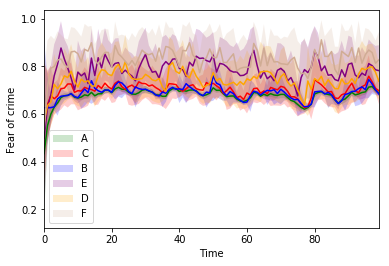

Media de crimen:0.7295769254475717
Homofilia: 0.167817960179
Puntaje Generacion 0.5877785500997332
-----------------------------------------------------------------------
Generacion 1


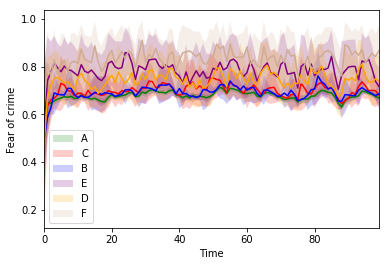

Media de crimen:0.7309637309682493
Homofilia: 0.175424079437
Puntaje Generacion 0.5891132101323184
-----------------------------------------------------------------------
Generacion 2


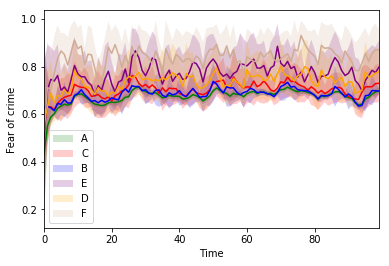

Media de crimen:0.7254228367563393
Homofilia: 0.167817960179
Puntaje Generacion 0.5912877712259937
-----------------------------------------------------------------------
Generacion 3


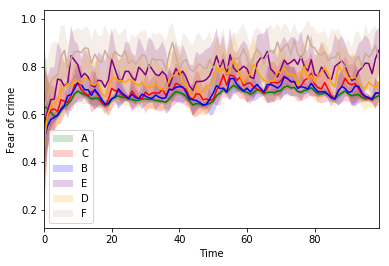

Media de crimen:0.7262814742955201
Homofilia: 0.175424079437
Puntaje Generacion 0.5938059151062622
-----------------------------------------------------------------------
Generacion 4


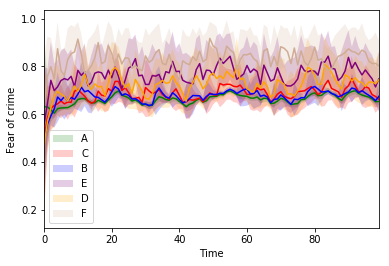

Media de crimen:0.7146366491512226
Homofilia: 0.175424079437
Puntaje Generacion 0.5969665065710688
-----------------------------------------------------------------------
Generacion 5


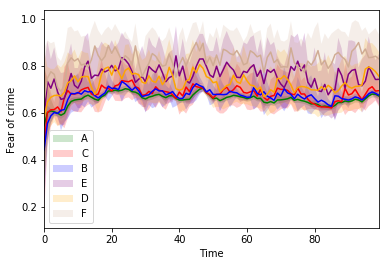

Media de crimen:0.7083566864363716
Homofilia: 0.166256157635
Puntaje Generacion 0.5971821208587441
-----------------------------------------------------------------------
Generacion 6


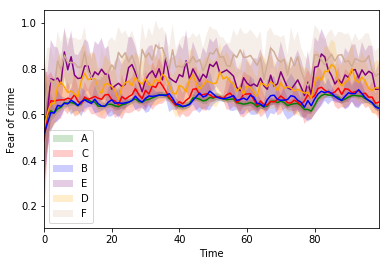

Media de crimen:0.7031832674705898
Homofilia: 0.17405719022
Puntaje Generacion 0.598445951203036
-----------------------------------------------------------------------
Generacion 7


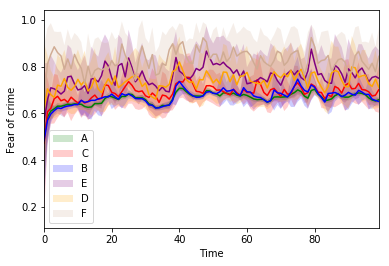

Media de crimen:0.7129961462774986
Homofilia: 0.157525773196
Puntaje Generacion 0.5995960278319215
-----------------------------------------------------------------------
Generacion 8


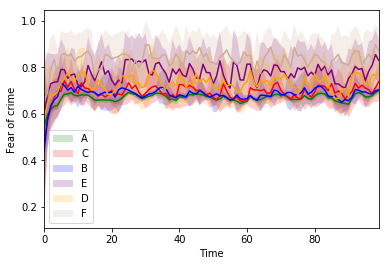

Media de crimen:0.7192821996264398
Homofilia: 0.166256157635
Puntaje Generacion 0.5997019801104455
-----------------------------------------------------------------------
Generacion 9


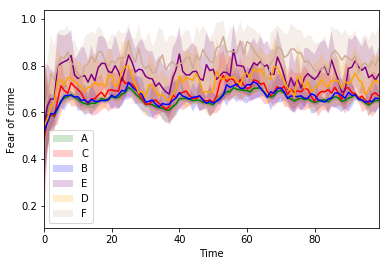

Media de crimen:0.7051198033498356
Homofilia: 0.17405719022
Puntaje Generacion 0.599782372748007
////////////////////////////////////////////////////////////////
Mejor Solucion:
{'matrix': [[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1

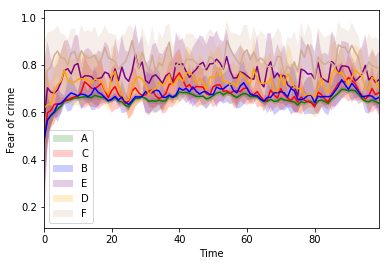

Media de crimen:0.7075367084770161
Homofilia: 0.158091286307


In [24]:
P=inicializacion(n_estados=10,crimen=crimen,min_porcent=min_porcent,size=nodos)

s0=np.random.rand(nodos)

print("Media miedo inicial: "+ str(np.mean(s0)))

total_generaciones=10


for i in range(total_generaciones):
    
    print("-----------------------------------------------------------------------")
    print("Generacion "+ str(i))
    
    puntaje_generacion=[]

    
    for estado in P:
        puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo,lamda))
        
    best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
    

    media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0,lamda)
    
    print("Media de crimen:" + str(media_crimen))
    
    homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))
    
    print("Homofilia: "+str(homo))
    
    print("Puntaje Generacion "+str(np.mean(puntaje_generacion)))


    #funcion densidad de probabilidad para muestrear estados de la poblacion actual que depende de su desempeño
    fdp=seleccion(Poblacion=P,s=s0,tipo=tipo_objetivo,lamda=lamda)

    #Hijos de la poblacion actual
    Nueva_Generacion=[]

    # Combinacion 
    while len(Nueva_Generacion) != len(P):
        padre1=sample(Poblacion=P,fdp=fdp)
        padre2=sample(Poblacion=P,fdp=fdp)
        hijos=combinacion(state1=padre1,state2=padre2)
        contador=0
        while (validar(state=hijos[0],crimen=crimen,min_porcent=min_porcent) and validar(state=hijos[1],crimen=crimen,min_porcent=min_porcent)) == False:
            hijos=combinacion(state1=padre1,state2=padre2)
            if contador == 200:
                hijos=[padre1,padre2]
                break
            contador+=1
        Nueva_Generacion+=hijos

    # Mutacion
    for i in range(len(Nueva_Generacion)):
        Nueva_Generacion[i]=mutacion(Nueva_Generacion[i],crimen)

    # Reemplazo

    total = P+Nueva_Generacion

    fo=[]
    for t in total:
        fo.append(funcion_objetivo(t,s0,tipo_objetivo,lamda))
    order=np.argsort(fo)[::-1]
    best=order[:len(P)]
    for i in range(len(P)):
        P[i]=total[best[i]]
print("////////////////////////////////////////////////////////////////")
puntaje_generacion=[]
for estado in P:
    puntaje_generacion.append(funcion_objetivo(estado,s0,tipo_objetivo,lamda))
best_cromosome_generation=np.argsort(puntaje_generacion)[-1]
print("Mejor Solucion:")
print(P[best_cromosome_generation])

media_crimen=plot(convert_matrix_to_vecinos(P[best_cromosome_generation]),s0,lamda)

print("Media de crimen:" + str(media_crimen))

homo=homofilia(convert_matrix_to_vecinos(P[best_cromosome_generation]))

print("Homofilia: "+str(homo))